**Introdução**

O naufrágio do RMS Titanic em 1912 é uma das tragédias marítimas mais conhecidas da história. A colisão com um iceberg resultou no afundamento do navio e na perda de mais de 1.500 vidas. Desde então, muitos estudos têm sido realizados para entender quais fatores influenciaram as chances de sobrevivência dos passageiros.

Neste projeto, utilizaremos técnicas de Machine Learning para prever a probabilidade de sobrevivência dos passageiros do Titanic com base em variáveis como idade, sexo, classe socioeconômica, entre outras. Para isso, utilizaremos o famoso conjunto de dados "Titanic: Machine Learning from Disaster", disponível na plataforma Kaggle.



In [9]:
# importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Configurando os gráficos
sns.set(style="whitegrid")

**carregando os dados**

In [12]:
# Carregando o dataset

df = pd.read_csv('C:/Users/lmbm3/OneDrive/Ambiente de Trabalho/train.csv')

In [13]:
# Visualizando as primeiras linhas
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

**Limpeza e Tratamento de Dados
Tratando Valores Nulos**

Coluna Age (idade): Preencher com a média.

Coluna Embarked (porto de embarque): Preencher com a moda (valor mais comum).

Coluna Cabin: Excluir por ter muitos valores nulos.

In [14]:
# Preenchendo valores nulos da idade com a média
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Preenchendo valores nulos do embarque com a moda
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Removendo colunas irrelevantes
df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

# Verificando se ainda existem valores nulos
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Transformação de Variáveis**
- **Codificando Variáveis Categóricas**

Sexo: male -> 0, female -> 1

Porto de Embarque: Codificação One-Hot (C, Q, S)



In [15]:
# Codificando a coluna 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Codificação One-Hot para o porto de embarque
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Visualizando o dataset transformado
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500           0           1
1         1       1    1  38.0      1      0  71.2833           0           0
2         1       3    1  26.0      0      0   7.9250           0           1
3         1       1    1  35.0      1      0  53.1000           0           1
4         0       3    0  35.0      0      0   8.0500           0           1


**Análise Exploratória dos Dados (EDA)**

**Distribuição de Sobrevivência**

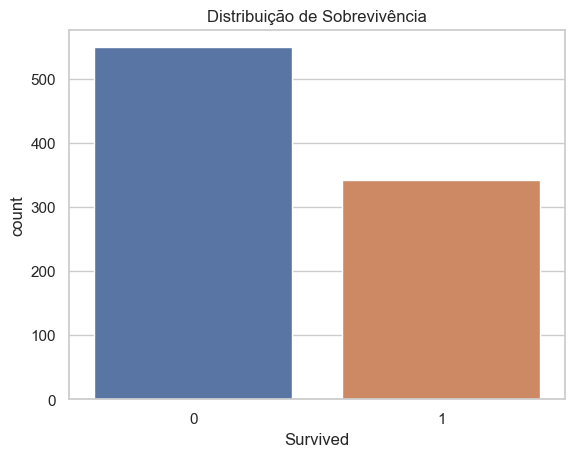

In [16]:
sns.countplot(data=df, x='Survived')
plt.title('Distribuição de Sobrevivência')
plt.show()

**Distribuição de Sobrevivência por Sexo**

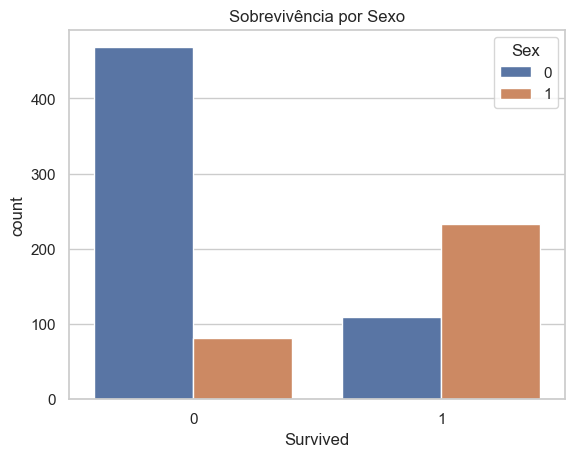

In [17]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title('Sobrevivência por Sexo')
plt.show()

**Distribuição de Sobrevivência por Classe**

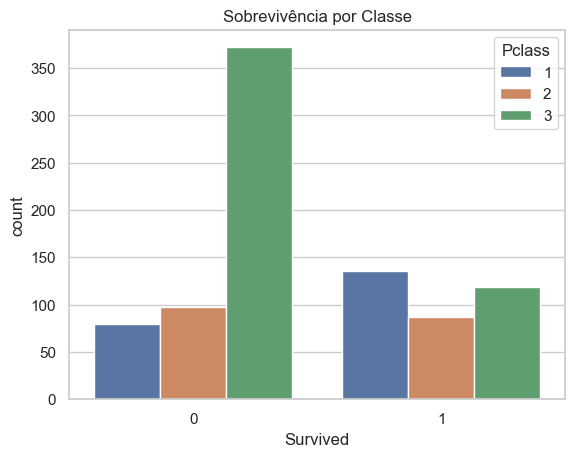

In [18]:
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title('Sobrevivência por Classe')
plt.show()

**Construção e Treinamento do Modelo**

**1 Separação dos Dados**

In [20]:
# Separando recursos (features) e alvo (target)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**2 Treinando o Modelo com Random Forest**

In [21]:
# Criando e treinando o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisão do Modelo: {accuracy:.2%}')

Precisão do Modelo: 79.10%


**Avaliação do Modelo**

**1 Matriz de Confusão**

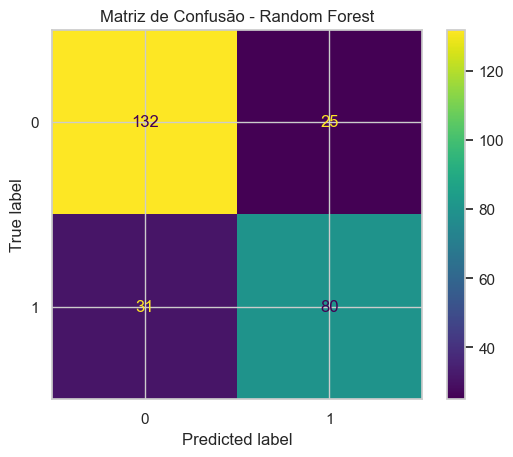

In [22]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão - Random Forest')
plt.show()

**Conclusão**

O modelo de Random Forest desenvolvido para prever a sobrevivência dos passageiros do Titanic apresentou uma precisão de 79.10%.
Esse resultado é considerado satisfatório, uma vez que o conjunto de dados possui diversas variáveis categóricas e numéricas que influenciam na predição.